# pandas Foundations
## What is pandas?
- Python library for data analysis
- High-performance containers for data analysis
- Data structures with a lot of functionality
    - Meaningful labels
    - Time series functionality
    - Handling missing data
    - Relational operations

## What you will learn
- How to work with pandas
    - Data import & export in various formats
- Exploratory Data Analysis using pandas
    - Statistical & graphical methods
- Using pandas to model time series
    - Time indexes, resampling

### Inspecting your data
You can use the DataFrame methods `.head()` and `.tail()` to view the first few and last few rows of a DataFrame. In this exercise, we'll import pandas as pd and load population data from 1960 to 2014 as a DataFrame `df_pop`. This dataset was obtained from the [World Bank][1].

[1]: http://databank.worldbank.org/data/reports.aspx?source=2&type=metadata&series=SP.URB.TOTL.IN.ZS#

In [1]:
import pandas as pd

In [2]:
filepath = '../_datasets/'
filename = 'world_ind_pop_data.csv'
urlDataset = 'https://assets.datacamp.com/production/course_1639/datasets/world_ind_pop_data.csv'

In [3]:
df_pop = pd.read_csv(urlDataset)
df_pop.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [4]:
df_pop = pd.read_csv(filepath+filename)
df_pop.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


### DataFrame data types
Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and `NaN` **('Not-a-Number')** types which often indicate missing data. The world population dataset contains some `NaN` values, a value often used as a place-holder for missing or otherwise invalid data entries. Use `df.info()` to determine information about the total count of `non-null` entries and infer the total count of `'null'` entries, which likely indicates missing data. 

In [5]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 418.0+ KB


### NumPy and pandas working together
Pandas depends upon and interoperates with `NumPy`, **the Python library for fast numeric array computations**. For example, you can use the DataFrame attribute `.values` *to represent a DataFrame as a NumPy array*. You can also pass pandas data structures to NumPy methods. In this exercise, we'll import numpy as np and load world population data every 10 years since 1960 into the DataFrame df.

Your job is to extract the values and store them in an array using the attribute `.values`. You'll then use those values as input into the NumPy `np.log10()` method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy `np.log10()` method and compare the results.

In [6]:
# Import numpy
import numpy as np

In [7]:
filename = 'world_population.csv'
df = pd.read_csv(filepath+filename)
df.head(2)

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09


In [8]:
# Create array of DataFrame values: np_vals
np_vals = df.values
# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)
np_vals_log10

array([[3.29225607, 9.48215448],
       [3.29446623, 9.5664166 ],
       [3.29666519, 9.64704933],
       [3.29885308, 9.72285726],
       [3.30103   , 9.78646566],
       [3.30319606, 9.84037481]])

In [9]:
# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

In [10]:
np_vals_log10 == df_log10.values

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

### Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. `list_keys` contains the column names `'Country'` and `'Total'`. `list_values` contains the full names of each country and the number of gold medals awarded. The values have been taken from [Wikipedia][1].

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the `list()`, `zip()`, `dict()` and `pd.DataFrame()` functions.

**Note: The `zip()` function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this zip object into a list, you'll need to use `list()`.**

[1]:https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table

In [11]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [12]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys,list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
df.head()

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]


,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Labeling your data
You can use the DataFrame attribute `df.columns` to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we'll define a DataFrame df containing top Billboard hits from the 1980s (from [Wikipedia][1]). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels `a, b, c, d`. Your job is to use the `df.columns` attribute to re-assign descriptive column labels.

[1]: https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1980s#1980

In [13]:
filename = 'billboard.csv'
df = pd.read_csv(filepath+filename)
df.head()

,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [14]:
# Build a list of labels: list_labels
list_labels = ['year','artist','song','chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df.head()

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


### Building DataFrames with broadcasting
You can implicitly use `'broadcasting'`, a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have the names of 15 cities as the list cities.

Your job is to construct a DataFrame from the list of cities and the string `'PA'`.

In [15]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

In [16]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
df.head()

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville


### Reading a flat file
In previous exercises, we have read data using the pandas function `read_csv()`. We'll reread **World Bank population data**, but simultaneously rename the columns using the names keyword input parameter, set equal to a list of new column labels. We will also need to set `header=0` to rename the column labels.

In [17]:
# Create a list of the new column labels: new_labels
new_labels = ['year','population']

In [18]:
filename = 'world_population.csv'
df = pd.read_csv(filepath+filename, header=0, names=new_labels)
df.head(2)

,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09


### Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from [Yahoo Finance][1]. The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable `file_messy`.

In addition, this file has three aspects that may cause trouble for lesser tools: **multiple header lines**, **comment records** (rows) interleaved throughout the data rows, and **space delimiters** instead of commas.

Your job is to use pandas to read the data from this problematic `file_messy` using non-default input options with `read_csv()` so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file , as you might do in a real data workflow.

You can learn about the option input parameters needed by using `help()` on the pandas function `pd.read_csv()`.

[1]: http://finance.yahoo.com/

In [19]:
filename = 'messy_stock_data.tsv'
df1 = pd.read_csv(filepath+filename)
df1.head()

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


In [20]:
# Read in the file with the correct parameters: df2
df2 = pd.read_csv(filepath+filename, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
df2.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [21]:
# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('tmp_clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

### Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the **matplotlib library**. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. Your job is to use the DataFrame method `df.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

The pandas `.plot()` method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Inspect the DataFrame using `df.head()`. Also, use `type(df)` and note that it is a single column DataFrame.

In [22]:
 import matplotlib.pyplot as plt

In [23]:
filename = 'weather_data_austin_2010.csv'
df_weather = pd.read_csv(filepath+filename, parse_dates=True, index_col = 'Date')
df_weather.columns = ['Temperature (deg F)', 'Dew Point (deg F)', 'Pressure (atm)']

In [24]:
df = df_weather['2010-08'][['Temperature (deg F)']]
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temperature (deg F)
Date,
2010-08-01 00:00:00,79.0
2010-08-01 01:00:00,77.4
2010-08-01 02:00:00,76.4
2010-08-01 03:00:00,75.7
2010-08-01 04:00:00,75.1


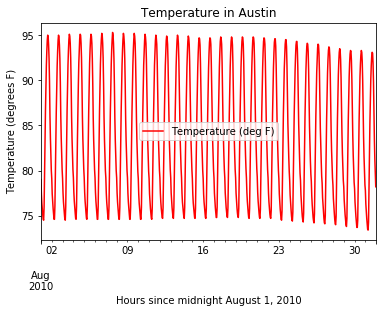

In [25]:
# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

### Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling `df.plot()` will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we'll load three columns of data from a weather data set - `temperature`, `dew point`, and `pressure` - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame `df[column_list]` to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created various plots.

In [26]:
df = df_weather['2010-08']
print((df.info()))
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2010-08-01 00:00:00 to 2010-08-31 23:00:00
Data columns (total 3 columns):
Temperature (deg F)    744 non-null float64
Dew Point (deg F)      744 non-null float64
Pressure (atm)         744 non-null float64
dtypes: float64(3)
memory usage: 23.2 KB
None


,Temperature (deg F),Dew Point (deg F),Pressure (atm)
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0


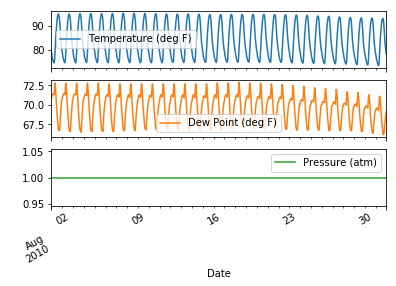

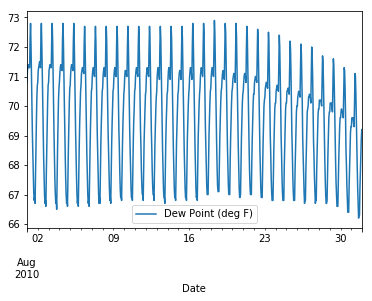

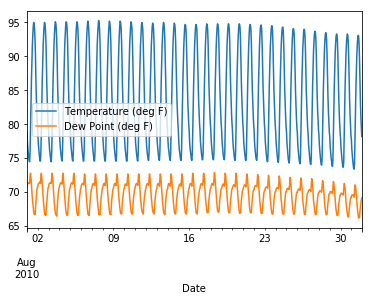

In [28]:
# Plot all columns (default)
df.plot
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.savefig('subplots.png')
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.savefig('DewPointdata.jpg')
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.savefig('DewPoint&Temperature.pdf')
plt.show()